In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
df = pd.read_csv("crime_data.csv")

# EDA

In [18]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [19]:
df.rename(columns={'Unnamed: 0':'states'},inplace=True)

In [20]:
df.head()

,states,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   states    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [22]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [23]:
df.isna().sum()

states      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

# Feature Scaling

In [25]:
cr = df[['Murder','Assault','UrbanPop','Rape']]
cr.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
sc= StandardScaler()
x = sc.fit_transform(cr)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

# Hierarchical Clustering

In [29]:
from scipy.cluster import hierarchy

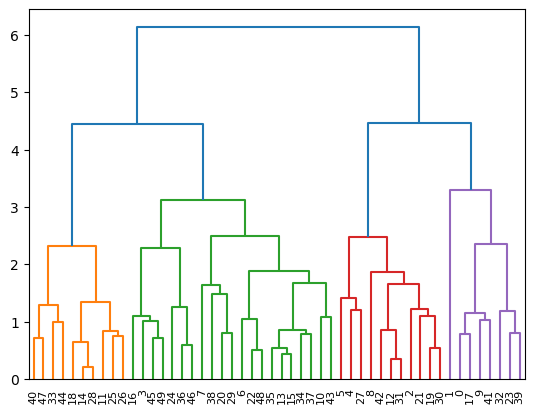

In [30]:
lk = hierarchy.linkage(x,method ='complete')
dendrogram = hierarchy.dendrogram(lk)

# Model Building

In [32]:
from sklearn.cluster import AgglomerativeClustering

In [33]:
hc = AgglomerativeClustering(n_clusters=4)
yhc = hc.fit_predict(x)
clusters = pd.DataFrame(yhc,columns =['Clusters'])

In [34]:
crimehc = pd.concat([df,clusters],axis=1)

In [35]:
crimehc

,states,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [36]:
crimehc.groupby('Clusters').agg('mean')

,Murder,Assault,UrbanPop,Rape
Clusters,,,,
0,6.210526,142.052632,71.263158,19.184211
1,10.966667,264.000000,76.500000,33.608333
2,3.091667,76.000000,52.083333,11.833333
3,14.671429,251.285714,54.285714,21.685714


# k-Means

In [38]:
from sklearn.cluster import KMeans

In [39]:
km = KMeans()
ykm = km.fit_predict(x)
ykm

array([4, 6, 5, 0, 1, 1, 3, 7, 6, 4, 3, 2, 5, 7, 2, 7, 0, 4, 2, 6, 3, 6,
       2, 4, 7, 0, 7, 1, 2, 3, 6, 5, 4, 2, 7, 7, 7, 3, 3, 4, 2, 4, 5, 3,
       2, 7, 7, 2, 2, 0])

In [40]:
km.cluster_centers_

array([[ 0.00858123, -0.34557544, -0.82279055, -0.4618082 ],
       [ 0.44344101,  0.88775677,  1.2417461 ,  2.21463743],
       [-1.18467401, -1.2201201 , -1.01470522, -1.11321445],
       [-0.7029322 , -0.57371376,  1.13872696, -0.556561  ],
       [ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ],
       [ 0.64637558,  0.95442337,  1.16614335,  0.58432434],
       [ 0.98614602,  1.41624113,  0.15771897,  1.40721005],
       [-0.32886996, -0.2795149 ,  0.17865511,  0.05155169]])

# Elbow graph

In [43]:
wcss=[]
for i in range(1,18):
    km = KMeans(n_clusters =i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

C:\Users\abc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [44]:
wcss

[200.0,
 104.96163315756871,
 79.92170303159772,
 57.66757825000804,
 50.0204259780583,
 44.07022642167418,
 39.66640562730455,
 35.41030612394714,
 31.497148753777005,
 29.524566885425457,
 25.218212153433736,
 23.14175469241023,
 20.99917354128697,
 19.94069045981867,
 18.02581252264034,
 17.283418859231148,
 16.225933401059315]

Text(0, 0.5, 'WCSS')

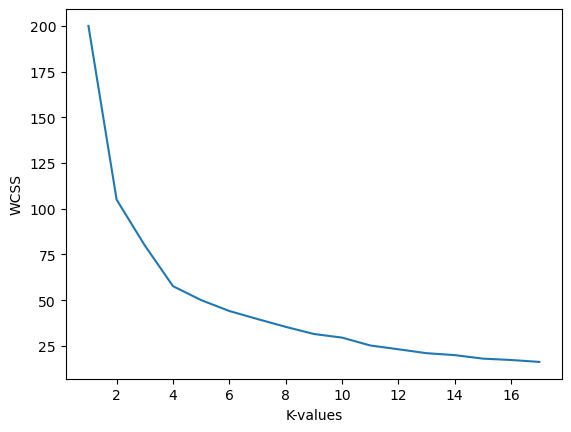

In [45]:
plt.plot(range(1,18),wcss)
plt.xlabel('K-values')
plt.ylabel('WCSS')

# Model

In [55]:
km = KMeans(n_clusters=4)
ykm = km.fit_predict(x)
ykm

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

# Evaluation of Model

In [49]:
from sklearn.metrics import silhouette_score

In [56]:
silhouette_score(x,ykm)

0.4084890326217641

In [57]:
from yellowbrick.cluster import SilhouetteVisualizer

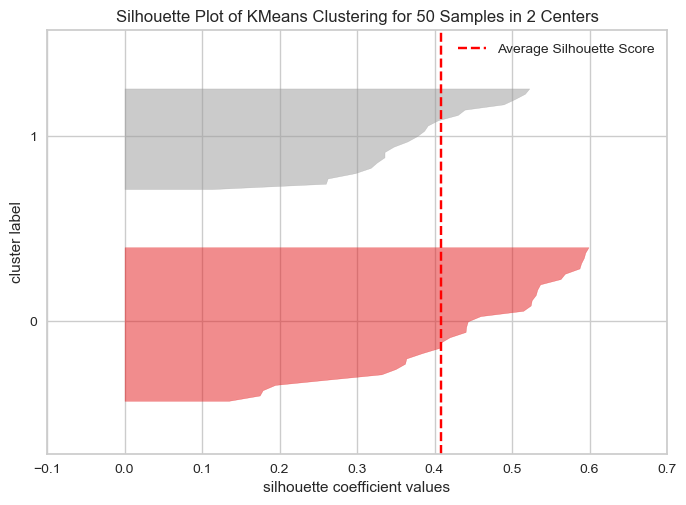

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 50 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [58]:
model = KMeans(n_clusters=4)
vis = SilhouetteVisualizer(model)
vis.fit(x)
vis.show()

# DBSCAN

In [60]:
cr.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [61]:
from sklearn.cluster import DBSCAN

In [65]:
db = DBSCAN()
ydb = db.fit_predict(x)
ydb

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [63]:
silhouette_score(x,ydb)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

# hyperparameter tuning
- finding out the best eps values(k-dist)

In [66]:
from sklearn.neighbors import NearestNeighbors

In [67]:
neigh = NearestNeighbors(n_neighbors=4).fit(x)
dist,ind = neigh.kneighbors(x)

In [68]:
pd.DataFrame(dist)

,0,1,2,3
0,0.0,0.780062,0.849285,0.925095
1,0.0,2.078984,2.136971,2.300884
2,0.0,1.048220,1.083411,1.093542
3,0.0,1.001328,1.007227,1.070570
4,0.0,1.208977,1.300691,1.323789
5,0.0,1.248863,1.300691,1.326068
6,0.0,0.881004,0.956432,0.994373
7,0.0,1.192276,1.271401,1.423126
8,0.0,1.309743,1.349263,1.450095
9,0.0,0.867978,1.022502,1.142922


In [69]:
distance = np.sort(dist[:,1],axis=0)

In [70]:
distance

array([0.2079438 , 0.2079438 , 0.35377437, 0.35377437, 0.43312429,
       0.43312429, 0.49909939, 0.49909939, 0.50466926, 0.52515083,
       0.53326883, 0.54082482, 0.54082482, 0.55122406, 0.57035779,
       0.58411812, 0.59956023, 0.59956023, 0.65497312, 0.70111326,
       0.71097658, 0.71809843, 0.71809843, 0.73797792, 0.74649625,
       0.75913104, 0.78006247, 0.78006247, 0.79455301, 0.79455301,
       0.80586349, 0.80586349, 0.83250223, 0.84928467, 0.8610239 ,
       0.86797806, 0.88100359, 0.95367898, 0.98866758, 0.99246041,
       1.0013278 , 1.0482199 , 1.0582674 , 1.08184506, 1.19227586,
       1.20897691, 1.20897691, 1.24886253, 1.30974334, 2.07898369])

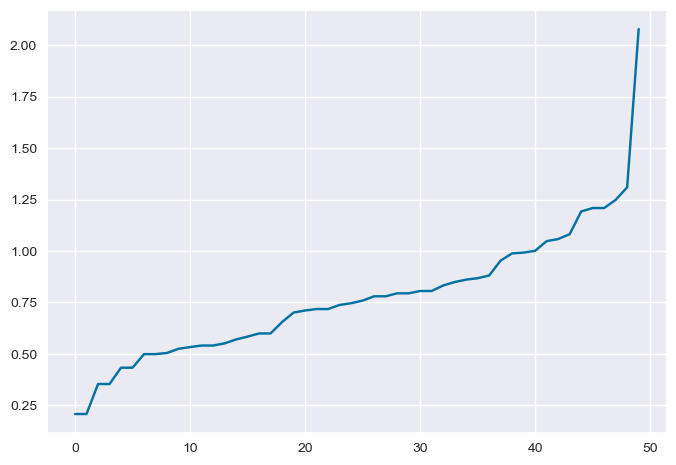

In [71]:
sns.set_style('darkgrid')
plt.plot(distance)

In [110]:
db = DBSCAN(eps=1.15,min_samples=4)
ydb = db.fit_predict(x)
ydb

array([ 0, -1,  1,  2, -1, -1,  2, -1, -1,  0,  2,  2,  1,  2,  2,  2,  2,
        0,  2,  1,  2,  1,  2,  0,  2,  2,  2, -1,  2,  2,  1,  1,  0,  2,
        2,  2,  2,  2,  2,  0,  2,  0,  1,  2,  2,  2,  2,  2,  2,  2],
      dtype=int64)

# Evaluation of DBscan

In [111]:
silhouette_score(x,ydb)

0.28523184583363054

In [106]:
cl = pd.DataFrame(ydb,columns=['Cluster'])

In [112]:
crimedb = pd.concat([df,cl],axis = 1)
crimedb

,states,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,0


In [113]:
crimedb['Cluster'].value_counts()

 2    30
 0     7
 1     7
-1     6
Name: Cluster, dtype: int64

# Conclusion
- silhouette_score for DBscan is 0.28
- silhouette_score for KMean is 0.40
- In Airlines we make 4 clusters according to DBscan ,KMean and Hierarchical clusters